# 1. 브랜드별 환불 비율

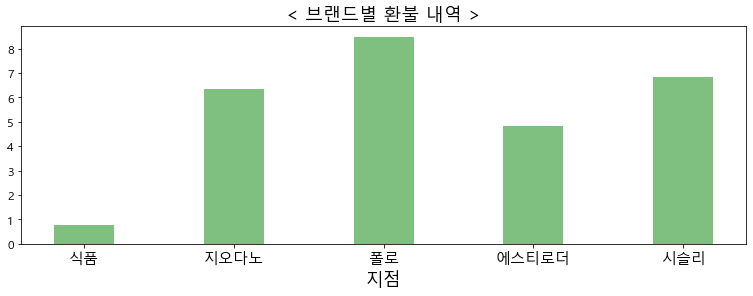

In [2]:
#라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 불러오기 and 병합
df = pd.read_csv("X_test.csv",encoding="cp949")
df1 = pd.read_csv("Y_test.csv",encoding="cp949")
train = pd.merge(df, df1, on='custid', how='left')
train

#고객별 구매 내역
# train_buy = train.groupby(["custid","brand"]).sum()
# train_buy

#환불 내역
train_refund = train[train["amount"]<0]

# 브랜드별 환불된 횟수
a1 = train_refund.groupby("brand").count()
a1

#환불 횟수 탑5 뽑기
a_1 = a1.sort_values('amount', ascending=False).head(5)
a_1

# 브랜드별 거래 횟수
a2 = train.groupby("brand").count()
a2

a_2 = a2.sort_values('amount', ascending=False)
a_2

# a_2 = a_2.reset_index(level=['brand']) # 컬럼으로 다시 전환
# a_2
a_3 = a_2.loc[["식품","지오다노","폴로","에스티로더","시슬리"]]
a_3


s1 = a_1["custid"]/a_3["custid"]
s1

#막대 그래프
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(13, 4))
x=a_1.index       # x축 항목
y= s1 *100  # y축 항목(값들)
plt.bar(x, y, color='g', alpha=0.5,width=0.4)   # alpha:투명도_ 연하게, 진하게 색 변화
plt.xticks(x[:],fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('지점',fontsize=18)  # x축 이름
# plt.ylabel('비율',fontsize=18)  # y축 이름
plt.title('< 브랜드별 환불 내역 >',fontsize=18)  # 그래프 제목 수정필요
plt.show()


In [ ]:
#브랜드별 환불내역
train_refund1 = train_refund.groupby(["brand","amount"]).count()
train_refund1

In [3]:
#환불 내역
train_refund = train[train["amount"]<0]
train_refund

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender
3,30000,2000-08-06 16:20,본점,4405600026000,퀵실버,진케주얼,진케주얼,"케주얼,구두,아동",0,-158000,-7900,1,1
27,30001,2000-05-06 17:03,본점,4220242014400,ELLE,내의,내의란제리,"케주얼,구두,아동",0,-64700,-3240,1,0
57,30002,2000-05-27 12:43,무역점,4204830010000,앤클라인,캐릭터,캐릭터캐쥬얼,여성캐주얼,0,-410000,-20500,3,1
83,30002,2000-07-16 16:20,본점,4229810011230,베네통,영트랜드,영트렌디,"케주얼,구두,아동",0,-31500,0,1,1
87,30002,2000-08-10 14:00,본점,2116050008000,에스티로더,수입종합화장품,화장품,잡화파트,1,-115000,-5750,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689633,49987,2001-04-24 17:22,신촌점,4422380020000,샤리템플,아동,아동,아동문화,0,-261000,-26100,3,1
689634,49987,2001-04-24 17:32,신촌점,4205561010000,기비,칼라드래디셔널,타운란제리,여성캐주얼,0,-308000,-30800,5,1
689673,49989,2000-08-17 13:40,신촌점,4220870013074,캐서린헴넷,뉴베이직캐주얼,어덜트캐주얼,영캐릭터,0,-200000,0,3,0
689706,49989,2000-12-24 16:10,무역점,4417740020470,빈,아동복,아동,"아동,스포츠",0,-98000,0,3,0


In [96]:
a_2.loc[a_2["brand"] in ["식품","지오다노","폴로","에스티로더","시슬리"],:]
# a_2.iloc[0]

brand              식품
custid         153161
date_time      153161
store          153161
product        153161
corner         153161
pc             153161
part           153161
imported       153161
amount         153161
discount       153161
installment    153161
gender         153161
Name: 0, dtype: object

In [71]:
# 특정 내역 가져오기
a3 = train["brand"] == "지오다노"
a4 = train[a3]
a4

,custid,date_time,store,product,brand,corner,pc,part,imported,amount,discount,installment,gender
103,30002,2000-10-11 17:03,무역점,4405620026000,지오다노,진캐쥬얼,진캐쥬얼,골프/유니캐쥬얼,0,47600,1490,1,1
110,30002,2000-11-10 18:50,본점,4405620026000,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,39800,1990,1,1
112,30002,2000-11-10 19:20,본점,4405620026000,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,190800,9540,3,1
114,30002,2000-11-22 15:50,본점,4405620026000,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,222400,11120,3,1
302,30011,2000-07-17 16:03,무역점,4405620026000,지오다노,진캐쥬얼,진캐쥬얼,골프/유니캐쥬얼,0,39800,1990,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689058,49972,2001-04-05 21:14,무역점,6244690026001,지오다노,미확인코너,(주)현스포츠아쌤,"아동,스포츠",0,59400,2970,3,0
689178,49977,2000-11-23 14:23,신촌점,4405620026000,지오다노,영캐주얼,영캐주얼,영플라자,0,34800,1740,1,1
689222,49980,2000-09-08 18:23,무역점,4405620026000,지오다노,진캐쥬얼,진캐쥬얼,골프/유니캐쥬얼,0,109400,5470,3,0
689431,49986,2000-06-22 16:23,본점,4405620026000,지오다노,진케주얼,진케주얼,"케주얼,구두,아동",0,49600,2480,1,0


In [49]:
a1.index

Index(['012베네통', '1492', '1492마일즈', '3N', '96NY', 'A-AND', 'AB.F.Z', 'ABFZ',
       'AEG', 'AQ넥타이',
       ...
       '휀시발라드', '휘나래', '휠라슈즈', '휠라의류', '휠라인티모', '휠라키즈', '휠라행사', '휴고보스', '흙침대',
       '희원상사'],
      dtype='object', name='brand', length=1540)

In [115]:
a_1.index

Index(['식품', '지오다노', '폴로', '에스티로더', '시슬리'], dtype='object', name='brand')

In [29]:
# 브랜드, 고객 환불내역
a = train_refund.groupby(["brand","custid","amount"]).count()
a

date_time  store  product  corner  pc  part  imported  \
brand  custid amount                                                            
012베네통 30072  -64000            1      1        1       1   1     1         1   
              -52000            1      1        1       1   1     1         1   
       30161  -119000           1      1        1       1   1     1         1   
       30240  -88000            1      1        1       1   1     1         1   
       30821  -48200            1      1        1       1   1     1         1   
...                           ...    ...      ...     ...  ..   ...       ...   
흙침대    47918  -4526320          1      1        1       1   1     1         1   
희원상사   32282  -25000            1      1        1       1   1     1         1   
       34596  -59000            1      1        1       1   1     1         1   
       43398  -86000            1      1        1       1   1     1         1   
       46024  -39000            1      1        1       1   1     1         1   

                        discount  installment  gender  
brand  custid amount                                   
012베네통 30072  -64000           1            1       1  
              -52000           1            1       1  
       30161  -119000          1            1       1  
       30240  -88000           1            1       1  
       30821  -48200           1            1       1  
...                          ...          ...     ...  
흙침대    47918  -4526320         1            1       1  
희원상사   32282  -25000           1            1       1  
       34596  -59000           1            1       1  
       43398  -86000           1            1       1  
       46024  -39000           1            1       1  

[45887 rows x 10 columns]

In [32]:
print(b.isnull().sum())

date_time      0
store          0
product        0
corner         0
pc             0
part           0
imported       0
discount       0
installment    0
gender         0
dtype: int64


In [30]:
#
b = a.groupby("brand").count()
b

,date_time,store,product,corner,pc,part,imported,discount,installment,gender
brand,,,,,,,,,,
012베네통,148,148,148,148,148,148,148,148,148,148
1492,41,41,41,41,41,41,41,41,41,41
1492마일즈,67,67,67,67,67,67,67,67,67,67
3N,1,1,1,1,1,1,1,1,1,1
96NY,180,180,180,180,180,180,180,180,180,180
...,...,...,...,...,...,...,...,...,...,...
휠라키즈,42,42,42,42,42,42,42,42,42,42
휠라행사,3,3,3,3,3,3,3,3,3,3
휴고보스,37,37,37,37,37,37,37,37,37,37


In [14]:
train_refund2 = train_refund.groupby(["brand","amount"]).sum()
train_refund2

custid        product  imported  discount  installment  \
brand  amount                                                             
012베네통 -478000    45636  4414100020000         1    -47800            3   
       -475000    31602  4414100020000         1    -23750            3   
       -397000    49987  4414100020000         1    -39700           10   
       -365000    49987  4414100020000         1    -36500           10   
       -335040    35871  4414100020000         1    -33500            1   
...                 ...            ...       ...       ...          ...   
흙침대    -2000000   45226  4538280944176         0         0            6   
희원상사   -86000     43398  4530810046070         0         0            3   
       -59000     34596  4530810046075         0         0            3   
       -39000     46024  4530810046070         0         0            1   
       -25000     32282  4530810046070         0         0            1   

                 gender  
brand  amount            
012베네통 -478000        1  
       -475000        0  
       -397000        1  
       -365000        1  
       -335040        0  
...                 ...  
흙침대    -2000000       0  
희원상사   -86000         0  
       -59000         1  
       -39000         0  
       -25000         0  

[32790 rows x 6 columns]

In [27]:
#브랜드당 환불된 횟수
train_refund3 = train_refund2.groupby("brand").count()
train_refund3

,custid,product,imported,discount,installment,gender
brand,,,,,,
012베네통,118,118,118,118,118,118
1492,29,29,29,29,29,29
1492마일즈,49,49,49,49,49,49
3N,1,1,1,1,1,1
96NY,100,100,100,100,100,100
...,...,...,...,...,...,...
휠라키즈,34,34,34,34,34,34
휠라행사,3,3,3,3,3,3
휴고보스,32,32,32,32,32,32


In [28]:
train_refund4 = train_refund.groupby("brand").count()
train_refund4

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender
brand,,,,,,,,,,,,
012베네통,150,150,150,150,150,150,150,150,150,150,150,150
1492,41,41,41,41,41,41,41,41,41,41,41,41
1492마일즈,67,67,67,67,67,67,67,67,67,67,67,67
3N,1,1,1,1,1,1,1,1,1,1,1,1
96NY,181,181,181,181,181,181,181,181,181,181,181,181
...,...,...,...,...,...,...,...,...,...,...,...,...
휠라키즈,42,42,42,42,42,42,42,42,42,42,42,42
휠라행사,3,3,3,3,3,3,3,3,3,3,3,3
휴고보스,37,37,37,37,37,37,37,37,37,37,37,37


In [26]:
train_refund3.sort_values((["brand","amount"]), axis=0, ascending=True)

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender
brand,,,,,,,,,,,,
012베네통,150,150,150,150,150,150,150,150,150,150,150,150
1492,41,41,41,41,41,41,41,41,41,41,41,41
1492마일즈,67,67,67,67,67,67,67,67,67,67,67,67
3N,1,1,1,1,1,1,1,1,1,1,1,1
96NY,181,181,181,181,181,181,181,181,181,181,181,181
...,...,...,...,...,...,...,...,...,...,...,...,...
휠라키즈,42,42,42,42,42,42,42,42,42,42,42,42
휠라행사,3,3,3,3,3,3,3,3,3,3,3,3
휴고보스,37,37,37,37,37,37,37,37,37,37,37,37


In [23]:
train_refund3.sort_values(["brand"], axis=0, ascending=False)

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender
brand,,,,,,,,,,,,
희원상사,4,4,4,4,4,4,4,4,4,4,4,4
흙침대,5,5,5,5,5,5,5,5,5,5,5,5
휴고보스,37,37,37,37,37,37,37,37,37,37,37,37
휠라행사,3,3,3,3,3,3,3,3,3,3,3,3
휠라키즈,42,42,42,42,42,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...,...,...,...,...,...
96NY,181,181,181,181,181,181,181,181,181,181,181,181
3N,1,1,1,1,1,1,1,1,1,1,1,1
1492마일즈,67,67,67,67,67,67,67,67,67,67,67,67


In [111]:
# train_refund6["custid"]/train_buy3["custid"].sum()*100
s = a_1/a_3*100
s

,custid,date_time,store,product,corner,pc,part,imported,amount,discount,installment,gender
brand,,,,,,,,,,,,
식품,0.771084,0.771084,0.771084,0.771084,0.771084,0.771084,0.771084,0.771084,0.771084,0.771084,0.771084,0.771084
지오다노,6.350000,6.350000,6.350000,6.350000,6.350000,6.350000,6.350000,6.350000,6.350000,6.350000,6.350000,6.350000
폴로,8.483146,8.483146,8.483146,8.483146,8.483146,8.483146,8.483146,8.483146,8.483146,8.483146,8.483146,8.483146
에스티로더,4.840345,4.840345,4.840345,4.840345,4.840345,4.840345,4.840345,4.840345,4.840345,4.840345,4.840345,4.840345
시슬리,6.826063,6.826063,6.826063,6.826063,6.826063,6.826063,6.826063,6.826063,6.826063,6.826063,6.826063,6.826063
